Import all necessary libraries

In [8]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Read the data from the csv file stored in GitHub

In [9]:
heart = pd.read_csv('https://raw.githubusercontent.com/CinderLeaf/CIS9660_Lab4/main/heart_2020_cleaned.csv')

Take a look at the dataset

In [10]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Check the shape and information about the dataset

In [11]:
heart.shape

(319795, 18)

In [12]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [24]:
heart['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

Generate a histogram to see the age distribution of the dataset

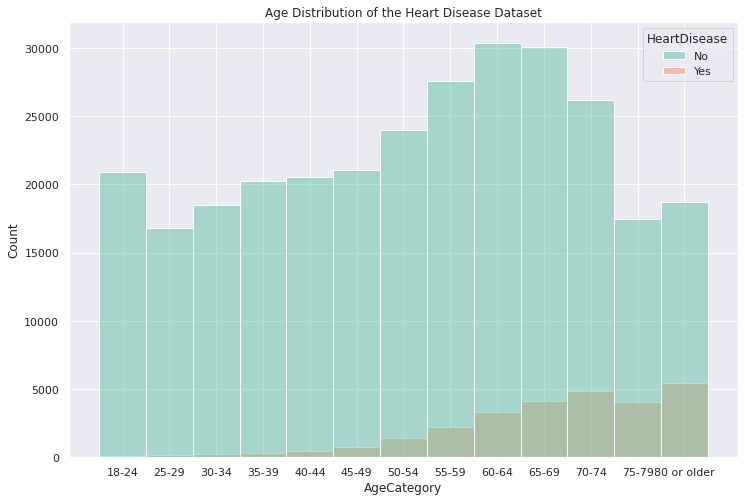

In [13]:
sns.set(rc={'figure.figsize':(12,8)})

#sort the column because since the column is not numeric, it will not be displayed in an orderly manner on the graph without sorting it.
age = heart.sort_values(by=['AgeCategory'])

sns.histplot(x = 'AgeCategory', data = age, palette = 'Set2', hue = 'HeartDisease').set(title = 'Age Distribution of the Heart Disease Dataset')
plt.show()

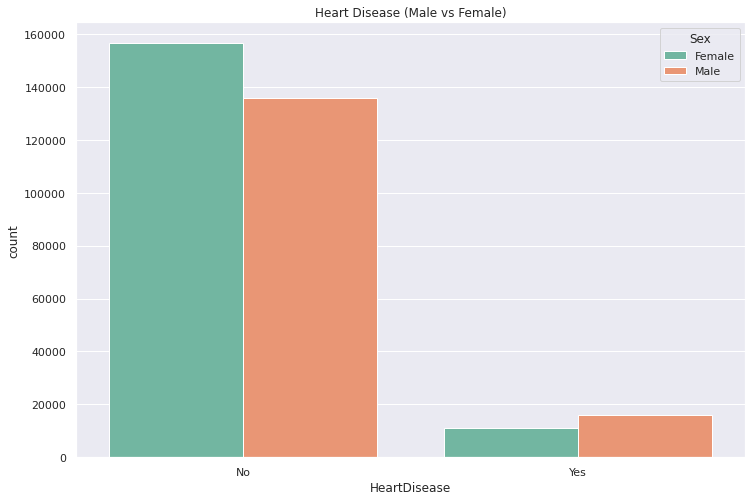

In [14]:
sns.countplot(x = 'HeartDisease', data = heart, hue = 'Sex', palette = 'Set2').set(title = "Heart Disease (Male vs Female)")
plt.show()

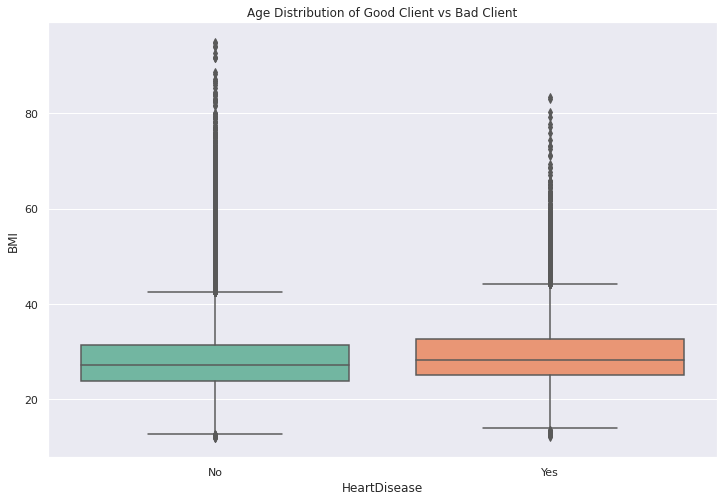

<Figure size 1440x1440 with 0 Axes>

In [15]:
sns.boxplot(x = 'HeartDisease', y = 'BMI', data = heart, palette = 'Set2').set(title = 'Age Distribution of Good Client vs Bad Client')
plt.figure(figsize=(20,20))
plt.show()

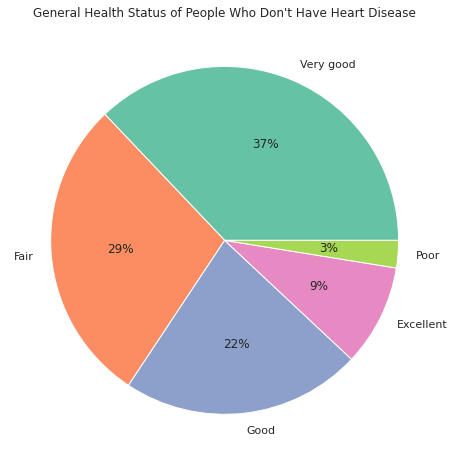

In [16]:
heart_no = heart.loc[heart['HeartDisease'] == 'No']
health = heart_no['GenHealth'].unique()

health_counts = heart_no['GenHealth'].value_counts()

colors = sns.color_palette('Set2')

plt.pie(health_counts.values, labels = health, colors = colors, autopct = '%.0f%%')
plt.title("General Health Status of People Who Don't Have Heart Disease")
plt.show()

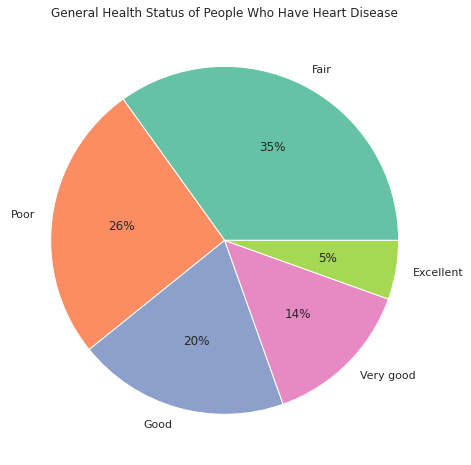

In [17]:
heart_yes = heart.loc[heart['HeartDisease'] == 'Yes']
health = heart_yes['GenHealth'].unique()

health_counts = heart_yes['GenHealth'].value_counts()

colors = sns.color_palette('Set2')

plt.pie(health_counts.values, labels = health, colors = colors, autopct = '%.0f%%')
plt.title("General Health Status of People Who Have Heart Disease")
plt.show()

Since the dataset is already cleaned, there is no null values. We will do one hot encoding to convert the categorical columns into numeric values.

In [18]:
#Check the columns that have more than two categorical, how many different categories each has
heart['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [19]:
heart['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [20]:
heart['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [21]:
heart['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [22]:
#convert all columns that only have two categories first
heart['Smoking'] = pd.get_dummies(heart['Smoking'], drop_first = True)
heart['AlcoholDrinking'] = pd.get_dummies(heart['AlcoholDrinking'], drop_first = True)
heart['Stroke'] = pd.get_dummies(heart['Stroke'], drop_first = True)
heart['DiffWalking'] = pd.get_dummies(heart['DiffWalking'], drop_first = True)
heart['Sex'] = pd.get_dummies(heart['Sex'], drop_first = True)
heart['PhysicalActivity'] = pd.get_dummies(heart['PhysicalActivity'], drop_first = True)
heart['Asthma'] = pd.get_dummies(heart['Asthma'], drop_first = True)
heart['KidneyDisease'] = pd.get_dummies(heart['KidneyDisease'], drop_first = True)
heart['SkinCancer'] = pd.get_dummies(heart['SkinCancer'], drop_first = True)

#convert all columns that have more than two categories
GenHealth_encoding = pd.get_dummies(heart['GenHealth'])
AgeCategory_encoding = pd.get_dummies(heart['AgeCategory'])
Race_encoding = pd.get_dummies(heart['Race'])
Diabetic_encoding = pd.get_dummies(heart['Diabetic'])

#drop the original columns
heart.drop(['GenHealth', 'AgeCategory', 'Race', 'Diabetic'], axis = 1, inplace = True)

#add the encoded columns back to the dataset
heart = heart.join(GenHealth_encoding)
heart = heart.join(AgeCategory_encoding)
heart = heart.join(Race_encoding)
heart = heart.join(Diabetic_encoding)

#check the dataset to make sure everything is added correctly
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,No,"No, borderline diabetes",Yes,Yes (during pregnancy)
0,No,16.60,1,0,0,3.0,30.0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,No,20.34,0,0,1,0.0,0.0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
2,No,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
3,No,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,No,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,0,1,1,0,0,0


In [23]:
heart.shape

(319795, 42)

Generate a correlation matrix

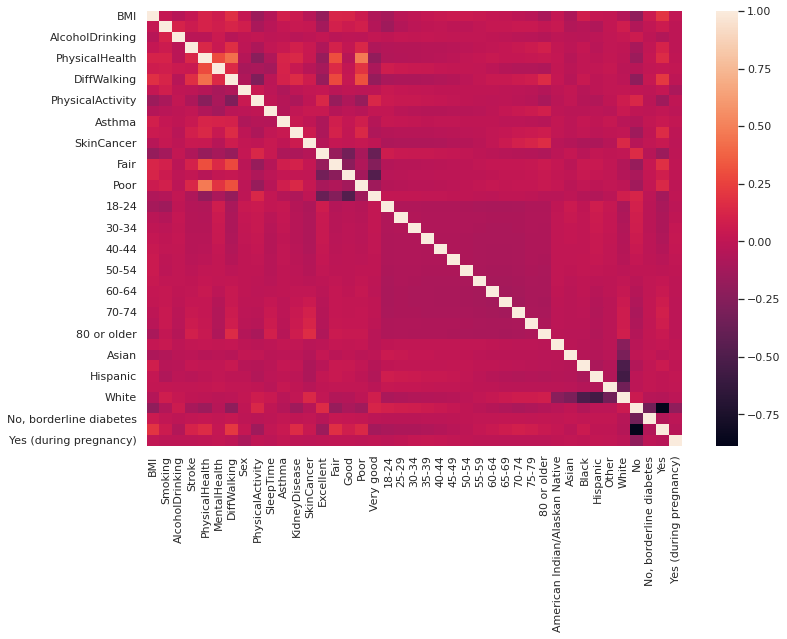

In [25]:
sns.heatmap(heart.corr())
plt.show()

All columns are now in numeric form, and there is no missing values, we can start splitting the training and test dataset

In [26]:
#assign the X(features) dataset
X = heart.drop('HeartDisease', axis = 1).values
X

array([[16.6 ,  1.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [20.34,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [26.58,  1.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [24.24,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [32.81,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [46.56,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [27]:
#assign the y(label) dataset
y = heart['HeartDisease'].values
y

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Because the difference between the BMI values are pretty large, a feature scaling needs to be performed to reduce the impact of larger values

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

Train the model to the training dataset

In [30]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train.ravel())

LogisticRegression()

Perform K-Fold Cross Validation

In [31]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

k = 5
kf = KFold(n_splits=k)

result = cross_val_score(classifier, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.915901290269743


Predict the test dataset using the model

In [32]:
#predict the teset dataset results
y_pred_log = classifier.predict(X_test)

#generate a set of the predicted probabilities
probs_y=classifier.predict_proba(X_test)

In [33]:
#Creating the probability dataframe
probability = pd.DataFrame(probs_y * 100 , columns =[['HeartDisease_No(%)', 'HeartDisease_Yes(%)']])

In [34]:
#Creating a dataframe with the predictions
y_pred_df = pd.DataFrame(y_pred_log, columns = [['y_pred']])

In [35]:
#Creating a dataframe with the acutal values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']])

In [36]:
#Creating a dataframe with the actual values, the predicted values, and the probabilites which such predictions were made
comparison_of_true_pred = pd.concat([y_test_df, y_pred_df, probability], axis = 1)

y_test will represent the actual records, and y_pred will represent the predicted records based on the model. 

In [37]:
comparison_of_true_pred

,y_test,y_pred,HeartDisease_No(%),HeartDisease_Yes(%)
0,No,No,84.953006,15.046994
1,No,No,98.940509,1.059491
2,No,No,96.755648,3.244352
3,No,No,97.818776,2.181224
4,No,No,84.663929,15.336071
...,...,...,...,...
95934,No,No,98.942016,1.057984
95935,No,No,95.768358,4.231642
95936,No,No,64.307743,35.692257
95937,No,No,89.358768,10.641232


Generate a confusion matrix to determine how effective the model is

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_log)
print(cm)

[[87007   723]
 [ 7365   844]]


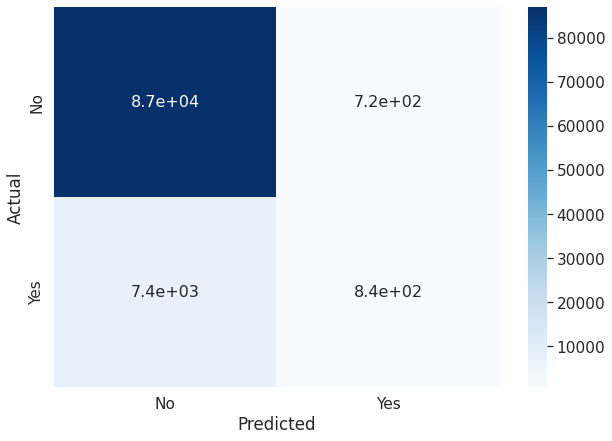

In [40]:
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

Generate a classification report

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

          No       0.92      0.99      0.96     87730
         Yes       0.54      0.10      0.17      8209

    accuracy                           0.92     95939
   macro avg       0.73      0.55      0.56     95939
weighted avg       0.89      0.92      0.89     95939



# SVM

Train the four svm kernels

In [ ]:
from sklearn import svm

#train all the svm kernels
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())

Perform 5-fold cross validation on the four kernels

In [ ]:
result = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Avg accuracy for linear svm:{result.mean()}')

result = cross_val_score(rbf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Avg accuracy for rbf svm:{result.mean()}')

result = cross_val_score(poly, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Avg accuracy for poly svm:{result.mean()}')

result = cross_val_score(sig, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Avg accuracy for sig svm:{result.mean()}')

Linear SVM Classification Report

In [ ]:
svm_linear_pred = linear.predict(X_test)

print(classification_report(y_test, svm_linear_pred))

RBF SVM Classification Report

In [ ]:
svm_rbf_pred = rbf.predict(X_test)
print(classification_report(y_test, svm_rbf_pred))

Poly SVM Classification Report

In [ ]:
svm_poly_pred = poly.predict(X_test)

print(classification_report(y_test, svm_poly_pred))

Sig SVM Classification Report

In [ ]:
svm_sig_pred = sig.predict(X_test)
print(classification_report(y_test, svm_sig_pred))